<a href="https://colab.research.google.com/github/JPG27784/Machine-Learning/blob/main/Case_Study_I_LC_LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

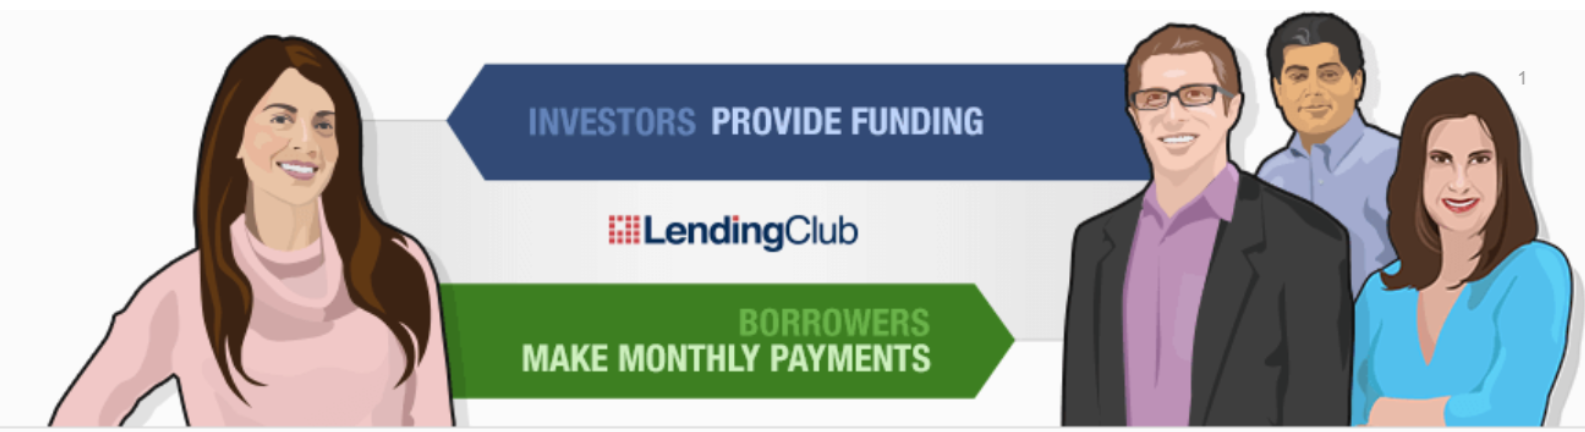

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [ ]:
## Load the dataset
data=pd.read_csv('/content/loans.csv')

In [ ]:
## Observe the first few rows
## Do you observe any issues?
pd.set_option('display.max_columns', None)
data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [ ]:
## Check the dataframe structure - datatypes and number of non-null rows
pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [ ]:
#check the duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
#view the columns of the dataset
data.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_amnt', 'loan_status'],
      dtype='object')

In [ ]:
## Check the shape
pd.set_option('display.max_columns', None)
data.shape

(38770, 23)

In [ ]:
## Check the missing values across the columns
pd.set_option('display.max_columns', None)
data.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


#### Observations

- Document your observations

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [ ]:
## Write your code
pd.set_option('display.max_columns', None)
data.describe()

,id,member_id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_pymnt_amnt
count,3.877000e+04,3.877000e+04,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,6.769960e+05,8.430892e+05,11069.122388,322.629489,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,22.059788,2735.887820
std,2.090226e+05,2.641345e+05,7362.292600,208.592815,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,11.420556,4486.352373
min,5.473400e+04,7.069900e+04,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5.127032e+05,6.619100e+05,5325.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,13.000000,216.822500
50%,6.579935e+05,8.410920e+05,9737.500000,278.150000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,20.000000,565.400000
75%,8.287202e+05,1.037010e+06,15000.000000,426.100000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,29.000000,3425.470000
max,1.077501e+06,1.314167e+06,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,36115.200000


In [ ]:
# Clean emp_length column and convert to numeric
data['emp_length'] = data['emp_length'].astype(str).str.extract('(\d+)').astype(float)

# Fill missing emp_length values with median
data['emp_length'].fillna(data['emp_length'].median(), inplace=True)

# Clean and convert 'term' column to numeric
data['term'] = data['term'].astype(str).str.replace(' months', '', regex=False)
data['term'] = pd.to_numeric(data['term'])

# Clean and convert 'int_rate' column to numeric, handling potential 'nan' strings
data['int_rate'] = data['int_rate'].astype(str).str.replace('%', '', regex=False)
data['int_rate'] = pd.to_numeric(data['int_rate'], errors='coerce') # Coerce errors to NaN
data['int_rate'].fillna(data['int_rate'].median(), inplace=True) # Fill with median after coercing

data['revol_util'] = data['revol_util'].astype(str).str.replace('%', '', regex=False)
data['revol_util'] = pd.to_numeric(data['revol_util'], errors='coerce') # Coerce errors to NaN
data['revol_util'].fillna(data['revol_util'].median(), inplace=True) # Fill with median after coercing

print("Data cleaning for 'term', 'int_rate', 'revol_util', and 'emp_length' completed.")

Data cleaning for 'term', 'int_rate', 'revol_util', and 'emp_length' completed.


In [ ]:
## Write your code

In [ ]:
## Write your code


##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [ ]:
## Drop the above columns
data.drop(['id','member_id','installment','last_pymnt_amnt'],axis=1,inplace=True)
print("Unnecessary columns dropped.")

Unnecessary columns dropped.


In [ ]:
## Check the dataframe again
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36,10.65,B,B2,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,Fully Paid
1,2500.0,60,15.27,C,C4,1.0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,Charged Off
2,2400.0,36,15.96,C,C5,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,Fully Paid
3,10000.0,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,Fully Paid
4,5000.0,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,Fully Paid


Perform any additional data preparation steps if needed

In [ ]:
## Write the code

In [ ]:
## Write the code

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

loan_status
0    33136
1     5634
Name: count, dtype: int64


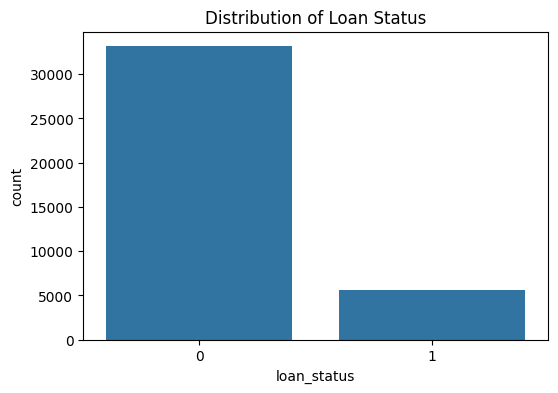


Term distribution:
term
36    29096
60     9674
Name: count, dtype: int64


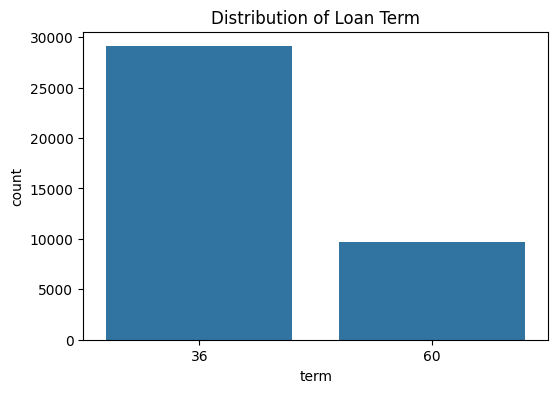


Grade distribution:
grade
B    11726
A    10052
C     7879
D     5121
E     2699
F      992
G      301
Name: count, dtype: int64


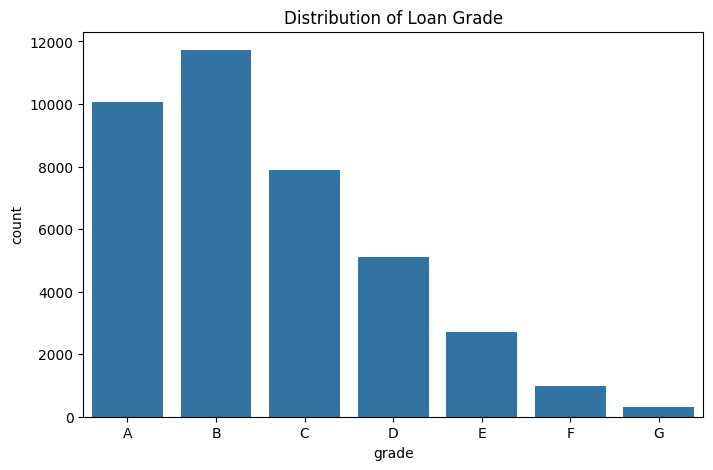


Purpose distribution:
purpose
debt_consolidation    18145
credit_card            5042
other                  3880
home_improvement       2902
major_purchase         2161
small_business         1766
car                    1512
wedding                 930
medical                 682
moving                  578
vacation                376
house                   369
educational             325
renewable_energy        102
Name: count, dtype: int64


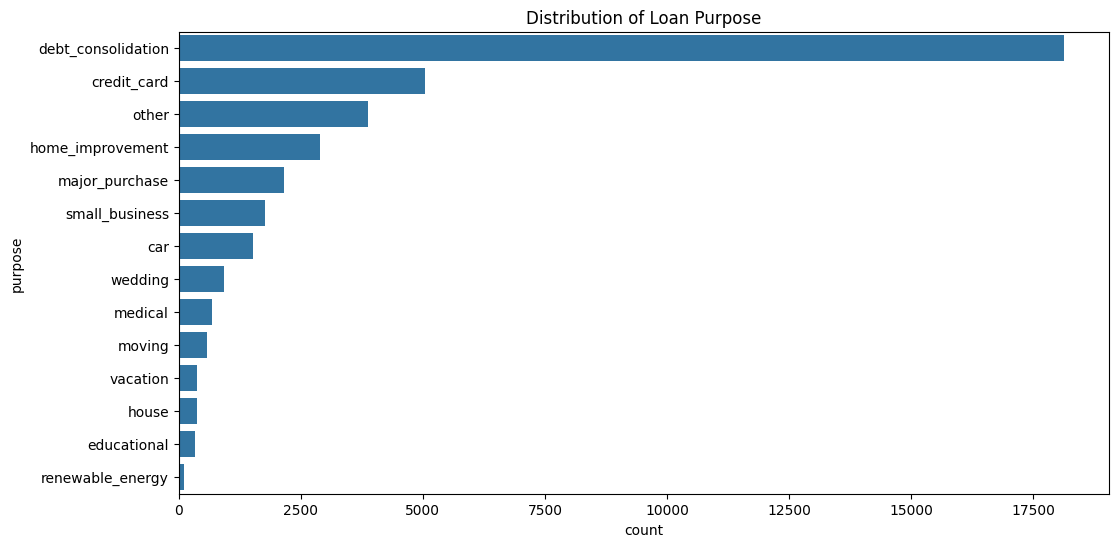


Loan Amount Summary Statistics:
count    38770.000000
mean     11069.122388
std       7362.292600
min        500.000000
25%       5325.000000
50%       9737.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


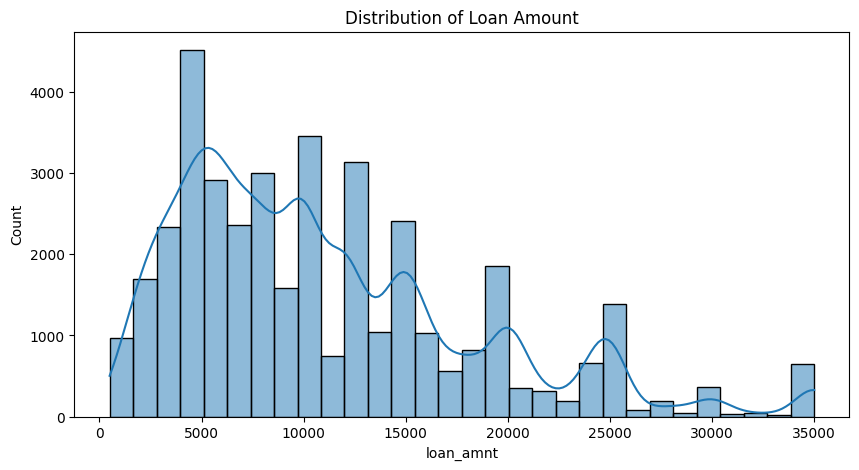


Annual Income Summary Statistics:
count    3.877000e+04
mean     6.880025e+04
std      6.416132e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.892350e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


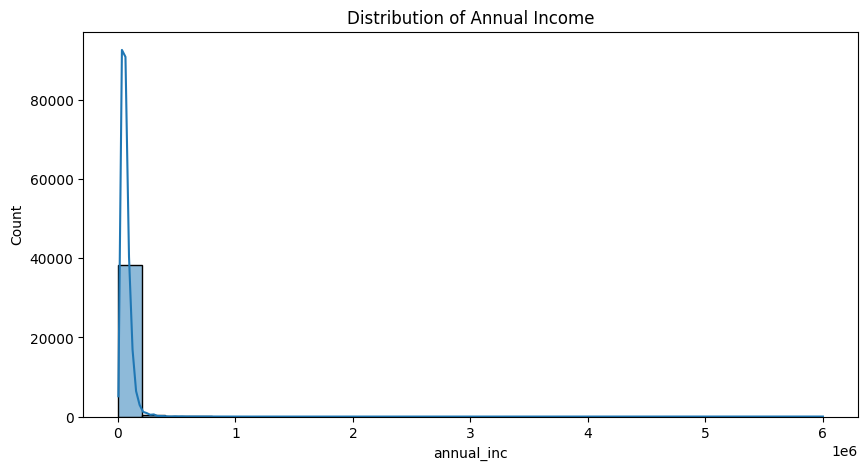

In [ ]:
# Map 'loan_status' to numerical values in the main DataFrame for plotting
data['loan_status'] = data['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Univariate Analysis for loan_status
print(data['loan_status'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

# Univariate Analysis for term
print("\nTerm distribution:")
print(data['term'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='term', data=data)
plt.title('Distribution of Loan Term')
plt.show()

# Univariate Analysis for grade
print("\nGrade distribution:")
print(data['grade'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='grade', data=data, order=sorted(data['grade'].unique()))
plt.title('Distribution of Loan Grade')
plt.show()

# Univariate Analysis for purpose
print("\nPurpose distribution:")
print(data['purpose'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(y='purpose', data=data, order=data['purpose'].value_counts().index)
plt.title('Distribution of Loan Purpose')
plt.show()

# Univariate Analysis for loan_amnt
print("\nLoan Amount Summary Statistics:")
print(data['loan_amnt'].describe())
plt.figure(figsize=(10,5))
sns.histplot(data['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

# Univariate Analysis for annual_inc
print("\nAnnual Income Summary Statistics:")
print(data['annual_inc'].describe())
plt.figure(figsize=(10,5))
sns.histplot(data['annual_inc'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.show()

**Observations**
loan_status:

The majority of loans are 'Fully Paid' (33,136 loans).
A significant number of loans are 'Charged Off' (5,634 loans), indicating defaults.
The dataset shows a class imbalance, with 'Fully Paid' being much more frequent than 'Charged Off'.
term:

The most common loan term is 36 months (29,096 loans).
The 60-month term is less frequent but still substantial (9,674 loans).
grade:

Loans are assigned grades from A to G, with B, A, and C being the most common grades in descending order.
Grades F and G have the fewest number of loans.
purpose:

'Debt consolidation' is by far the most frequent purpose for a loan (18,145 loans).
'Credit card', 'other', and 'home improvement' are also common purposes.
'Renewable energy' and 'educational' are the least common purposes.
loan_amnt:

The loan amounts range from $500 to $35,000.
The average loan amount is approximately $11,069.
The distribution appears to be right-skewed, with a higher concentration of smaller loan amounts.
annual_inc:

Annual incomes vary widely, from $4,000 to $6,000,000.
The average annual income is about $68,800.
The distribution is highly right-skewed, indicating that most borrowers have lower to moderate incomes, with a few individuals having very high incomes (potential outliers).


#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

In [ ]:
#Write your code here
# Function to plot default rates for categorical variables
# def plot_default_rate(df, col, figsize=(10, 6), rotation=0):
#     plt.figure(figsize=figsize)
#     df_agg = df.groupby(col)['loan_status'].mean().sort_values(ascending=False)
#     sns.barplot(x=df_agg.index, y=df_agg.values, palette='viridis')
#     plt.title(f'Default Rate by {col}')
#     plt.xlabel(col)
#     plt.ylabel('Default Rate')
#     if rotation:
#         plt.xticks(rotation=rotation)
#     plt.show()

# # Analyze default rate by term
# plot_default_rate(data, 'term')

# # Analyze default rate by grade
# plot_default_rate(data, 'grade', figsize=(10, 6), rotation=45)

# # Analyze default rate by home_ownership
# plot_default_rate(data, 'home_ownership')

# # Analyze default rate by verification_status
# plot_default_rate(data, 'verification_status')

# # Analyze default rate by emp_length
# plot_default_rate(data, 'emp_length', figsize=(12, 6))

# # Analyze default rate by purpose
# plot_default_rate(data, 'purpose', figsize=(12, 6), rotation=90)

In [ ]:
#Write your code here

In [ ]:
#Write your code here

In [ ]:
#Write your code here

In [ ]:
#Write your code here

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- train-test split
- handle class imbalance
- scaling

##### Encoding variables

In [ ]:
# Write code here
# Identify categorical columns to encode
categorical_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the updated DataFrame info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38770 non-null  float64
 1   term                                 38770 non-null  int64  
 2   int_rate                             38770 non-null  float64
 3   emp_length                           38770 non-null  float64
 4   annual_inc                           38770 non-null  float64
 5   dti                                  38770 non-null  float64
 6   delinq_2yrs                          38770 non-null  float64
 7   inq_last_6mths                       38770 non-null  float64
 8   open_acc                             38770 non-null  float64
 9   pub_rec                              38770 non-null  float64
 10  revol_bal                            38770 non-null  float64
 11  revol_util                  

**Train-test split**


In [ ]:
# Write code here
from sklearn.model_selection import train_test_split

X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Encode the target variable 'loan_status' to numerical values
y = y.map({'Fully Paid': 0, 'Charged Off': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the first few rows of the prepared data
print("Training features:\n", X_train[:5])
print("Training target:\n", y_train[:5])
print("Testing features:\n", X_test[:5])
print("Testing target:\n", y_test[:5])

In [ ]:
# Write code here

**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Convert boolean columns to int (0/1) in X_train
for col in X_train.select_dtypes(include='bool').columns:
    X_train[col] = X_train[col].astype(int)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Original dataset shape:", len(y_train))
print("Resampled dataset shape:", len(y_resampled))

Original dataset shape: 46416
Resampled dataset shape: 46416


In [ ]:
## Write code

In [ ]:
## Write code


In [ ]:
print("Resampled target variable distribution:")
print(y_resampled.value_counts())

Resampled target variable distribution:
loan_status
0    23208
1    23208
Name: count, dtype: int64


In [ ]:
# Assign the resampled data to X_train and y_train
X_train = X_resampled
y_train = y_resampled

In [ ]:
## Check the samples


**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Identify numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply scaler to training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply scaler to test data using the same fitted scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Scaling applied to numerical columns in X_train and X_test.")
print("X_train head after scaling:")
print(X_train.head())

Scaling applied to numerical columns in X_train and X_test.
X_train head after scaling:
   loan_amnt  term  int_rate  emp_length  annual_inc       dti  delinq_2yrs  \
0   0.333333   0.0  0.407407    0.111111    0.008707  0.328443          0.0   
1   0.507246   0.0  0.238393    0.333333    0.034888  0.156719          0.0   
2   0.702899   0.0  0.203965    0.333333    0.014353  0.027342          0.0   
3   0.217391   0.0  0.238393    0.555556    0.007680  0.218740          0.0   
4   1.000000   1.0  0.456442    1.000000    0.042588  0.083028          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0           0.125  0.166667      0.0   0.063427    0.730731   0.117647   
1           0.000  0.023810      0.0   0.000000    0.000000   0.082353   
2           0.000  0.142857      0.0   0.006126    0.068068   0.070588   
3           0.000  0.047619      0.0   0.050018    0.523524   0.047059   
4           0.125  0.261905      0.0   0.177393    0.321321   0.247

### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 0.8348


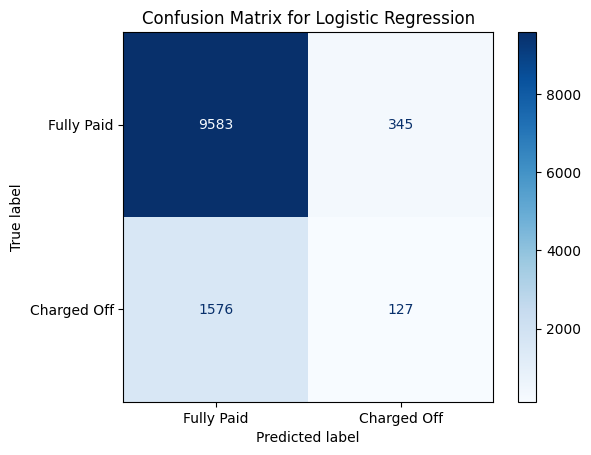

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fully Paid', 'Charged Off'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### XGBoost Model

XGBoost Model Accuracy: 0.8446


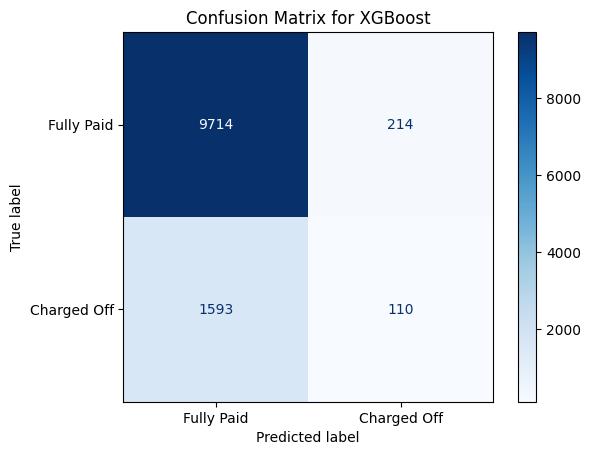


Classification Report for XGBoost:
               precision    recall  f1-score   support

  Fully Paid       0.86      0.98      0.91      9928
 Charged Off       0.34      0.06      0.11      1703

    accuracy                           0.84     11631
   macro avg       0.60      0.52      0.51     11631
weighted avg       0.78      0.84      0.80     11631



In [ ]:
import xgboost as xgb

# Initialize XGBoost Classifier
# Using 'scale_pos_weight' to handle class imbalance
# You might need to calculate the ratio of negative to positive samples
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='logloss',
                              use_label_encoder=False,
                              scale_pos_weight=ratio,
                              random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Fully Paid', 'Charged Off'])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost')
plt.show()

# Classification Report for XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Fully Paid', 'Charged Off'])
print("\nClassification Report for XGBoost:\n", report_xgb)

#### Observations for XGBoost



### Random Forest Classifier

Random Forest Model Accuracy: 0.8502


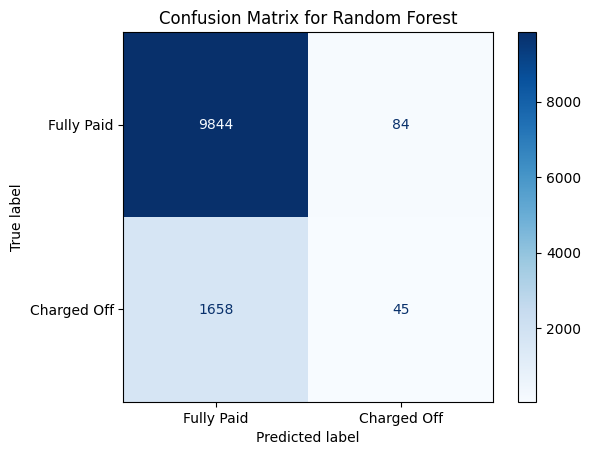


Classification Report for Random Forest:
               precision    recall  f1-score   support

  Fully Paid       0.86      0.99      0.92      9928
 Charged Off       0.35      0.03      0.05      1703

    accuracy                           0.85     11631
   macro avg       0.60      0.51      0.48     11631
weighted avg       0.78      0.85      0.79     11631



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Fully Paid', 'Charged Off'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Classification Report for Random Forest
report_rf = classification_report(y_test, y_pred_rf, target_names=['Fully Paid', 'Charged Off'])
print("\nClassification Report for Random Forest:\n", report_rf)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-validation Recall Score: 0.8240

Best Random Forest Model Accuracy on Test Set: 0.8505


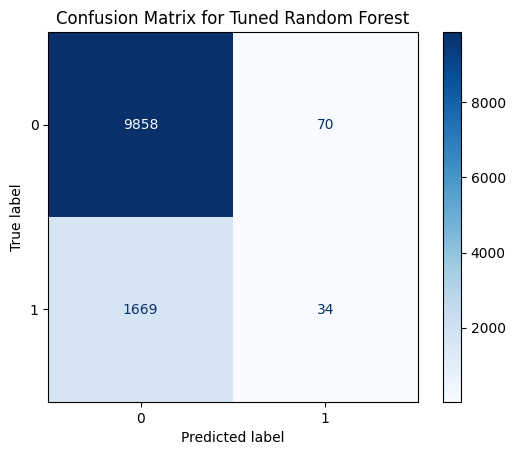


Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      9928
           1       0.33      0.02      0.04      1703

    accuracy                           0.85     11631
   macro avg       0.59      0.51      0.48     11631
weighted avg       0.78      0.85      0.79     11631



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, make_scorer # Import metrics
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a custom scorer for recall that handles zero_division
custom_recall_scorer = make_scorer(recall_score, zero_division=0)

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=custom_recall_scorer) # Use the custom scorer

# Fit GridSearchCV to the resampled training data
grid_search.fit(X_train, y_train) # Changed X_train_scaled to X_train and y_train_resampled to y_train

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Recall Score: {best_score:.4f}")

# Evaluate the best model found by GridSearchCV on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test) # Changed X_test_scaled to X_test

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"\nBest Random Forest Model Accuracy on Test Set: {accuracy_best_rf:.4f}")

cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf, display_labels=best_rf_model.classes_)
disp_best_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Random Forest')
plt.show()

print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_best_rf))

#### Observations for Random Forest

- Document your observations

### Decision Tree Model

Decision Tree Model Accuracy: 0.7563


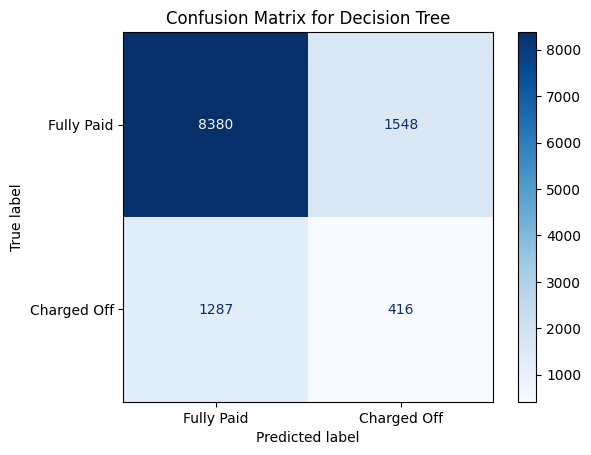


Classification Report for Decision Tree:
               precision    recall  f1-score   support

  Fully Paid       0.87      0.84      0.86      9928
 Charged Off       0.21      0.24      0.23      1703

    accuracy                           0.76     11631
   macro avg       0.54      0.54      0.54     11631
weighted avg       0.77      0.76      0.76     11631



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt:.4f}")

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Fully Paid', 'Charged Off'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Classification Report for Decision Tree
report_dt = classification_report(y_test, y_pred_dt, target_names=['Fully Paid', 'Charged Off'])
print("\nClassification Report for Decision Tree:\n", report_dt)

#### Observations for Decision Tree

- Document your observations

Decision Tree Model Accuracy: 0.7563


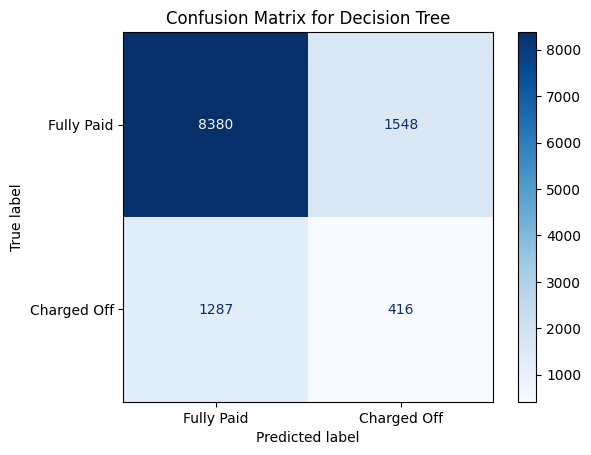


Classification Report for Decision Tree:
               precision    recall  f1-score   support

  Fully Paid       0.87      0.84      0.86      9928
 Charged Off       0.21      0.24      0.23      1703

    accuracy                           0.76     11631
   macro avg       0.54      0.54      0.54     11631
weighted avg       0.77      0.76      0.76     11631



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt:.4f}")

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Fully Paid', 'Charged Off'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Classification Report for Decision Tree
report_dt = classification_report(y_test, y_pred_dt, target_names=['Fully Paid', 'Charged Off'])
print("\nClassification Report for Decision Tree:\n", report_dt)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Fully Paid', 'Charged Off'])
print("Classification Report for Logistic Regression:\n", report)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

  Fully Paid       0.86      0.97      0.91      9928
 Charged Off       0.27      0.07      0.12      1703

    accuracy                           0.83     11631
   macro avg       0.56      0.52      0.51     11631
weighted avg       0.77      0.83      0.79     11631



Observations

- Document your observations

Next go ahead and build a decision tree and other models using the similar steps as above

Note
- You can build additional models as well
- Make sure you're performing the necessary steps to evaluate the model

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 80%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting

## Summary

Based on the problem statement, Lending Club needs a system to predict whether a loan is likely to default. While overall accuracy is important, the ability to correctly identify 'Charged Off' loans (high recall for class 1) is critical to mitigate financial losses. A model with high overall accuracy but low recall for the minority class (like Random Forest and XGBoost) would lead to many undetected defaulting loans.

Comparing the models:

Logistic Regression, Random Forest, and XGBoost all show good overall accuracy but struggle significantly with the recall of 'Charged Off' loans.
Decision Tree has the lowest overall accuracy but achieves the highest recall for the 'Charged Off' class (0.24). This means it is better at identifying actual defaulting loans, even if it makes more false positive predictions (lower precision).
Given that identifying defaulting loans is the primary goal, and minimizing financial loss is key, the Decision Tree model is the most suitable among the models built. Although its precision for 'Charged Off' is low, its recall is the best, meaning it captures a higher percentage of the actual defaults. In a real-world scenario for Lending Club, it might be more acceptable to have some false positives (rejecting a credit-worthy customer) than to have many false negatives (approving a loan that defaults).

---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.